In [15]:
import seaborn as sns
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [16]:
planets.shape

(1035, 6)

## Veri setinin hikayesi nedir?

Bu veri seti NASA'nın yayınladığı bir galaksi keşfi ile ilgili bir veri setidir.

Method galaksilerin bulunma şeklidir.

number ifadesi bulunan sistemlerdeki gezegen sayısını ifade eder.

orbital_period yörünge dönemini ifade eder.

mass kütledir. m*sin

distance uzaklığı ifade eder.

year bulunma tarihidir.

In [17]:
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


## veri setini yapısal bilgileri

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [19]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

## en iyi adım 

object olarak gördüğümüz değerleri categorical olana çevirmektir. Her aşamada categorical daha iyi işliyor.

Sebebi frameworklerin fonksiyonlarla çalıştığından dolayı bazı fonksiyonları çalıştırdığımızda categorical haricindeki typeları string olarak almaktadır. Dataframe'de typelara bakmak istersek iki tip type bulunmaktadır. biri nümerik değerler diğeri ise categorical. Nümerik değerler float ve int olarak ayrılır. İnt kesikli olarak sayıları tam sayı şeklinde, float sürekli sayıları ifade etmektedir.

In [20]:
import pandas as pd
df.method = pd.Categorical(df.method)

In [21]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [22]:
df.shape

(1035, 6)

In [23]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [29]:
df.isnull().values.any()

True

In [31]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [32]:
df["orbital_period"].fillna(0,inplace = True)

In [33]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

In [34]:
df = planets.copy()

In [35]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [39]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

## Kategorical islemler

df.select_dtypes fonksiyonu ile dataframede istediğimiz typetaki değerleri seçebilmemizi sağlamaktadır. fonksiyona parametre olarak include = ["object"] değeri almaktadır.

In [38]:
kat_df = df.select_dtypes(include = ["object"])
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [42]:
kat_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [47]:
kat_df["method"].value_counts().count()

10

In [49]:
kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

## Sürekli zaman değişkenleri

int64 float64

In [50]:
df_num = df.select_dtypes(include = ["float64","int64"])
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [55]:
df_num["mass"].describe()

count    513.000000
mean       2.638161
std        3.818617
min        0.003600
25%        0.229000
50%        1.260000
75%        3.040000
max       25.000000
Name: mass, dtype: float64

## Başka bir dataframe

In [56]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [60]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [61]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [62]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

# Ordinal tanımlama

Elimizde bulunan categorical değerler örneğin color veya cut değeri sıralamalı değerdir. Colorda bulunan j en ucuz ürünü, E en pahalı ürünü gösterir. Bunu pythona anlatmamız gerekmektedir.

In [63]:
from pandas.api.types import CategoricalDtype

In [64]:
df["cut"].head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [66]:
df.cut = df.cut.astype(CategoricalDtype(ordered = True))

In [67]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [68]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

Program 'Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair' olarak bir sıralama tanımı yaptı fakat bizim dataframede cut böyle sıralanmamıştır. Bu yüzden gerekli sıralamayı pythona bildirmemiz gerekmektedir. 

In [69]:
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]

In [71]:
df.cut = df.cut.astype(CategoricalDtype(ordered = True, categories = cut_kategoriler))

In [72]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

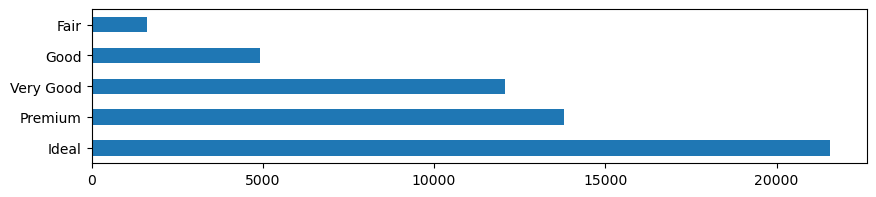

In [76]:
df["cut"].value_counts().plot.barh(figsize = (10,2));

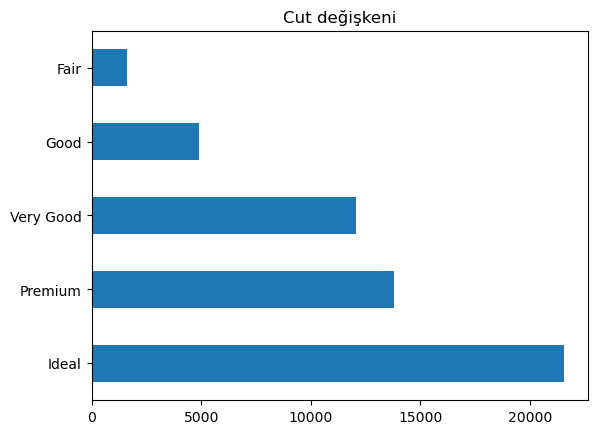

In [81]:
df["cut"].value_counts().plot.barh().set_title("Cut değişkeni");

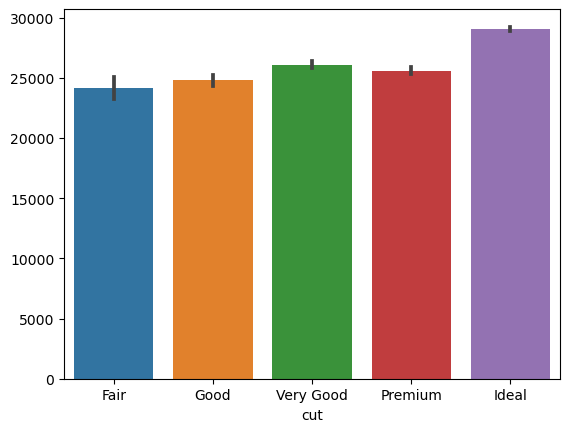

In [82]:
sns.barplot(x = "cut", y = df.cut.index, data = df);

## Çaprazlama

Cut categorical type ile price'ı çaprazlayarak görselleştirme

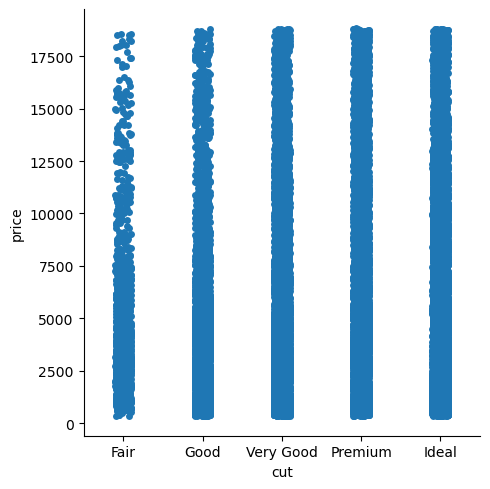

In [84]:
sns.catplot(x = "cut", y = "price", data = df);

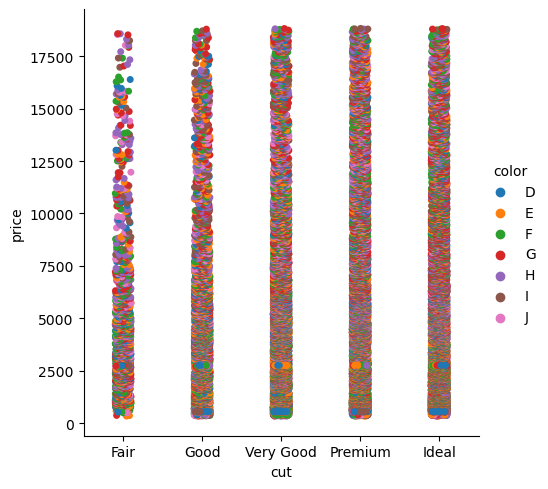

In [85]:
sns.catplot(x = "cut", y = "price", hue = "color", data = df);

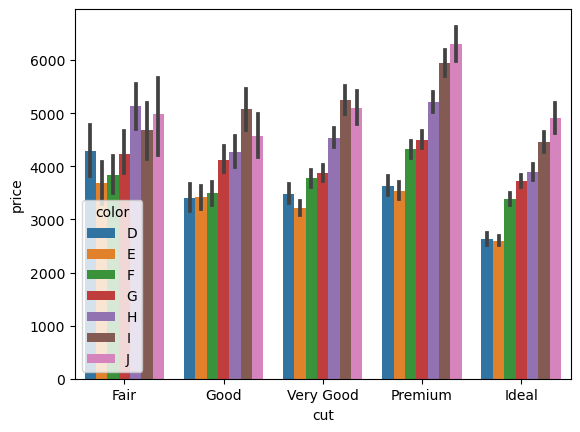

In [91]:
sns.barplot(x = "cut", y = "price", hue = "color", data = df);

## hue eklemeden önce yukarıda price değişkeni 0 ile 18000 arasında değer almaktadır
##fakat hur değişkeni ortalama sonucu verdiğinden kaynaklı hue kullanıldıktan sonra 0 ile 6000 arasında değerler gözlemleriz

In [90]:
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

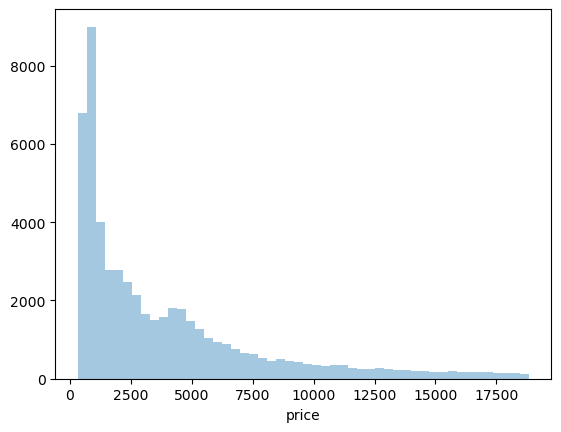

In [94]:
import warnings
warnings.simplefilter("ignore")

sns.distplot(df.price, kde = False);

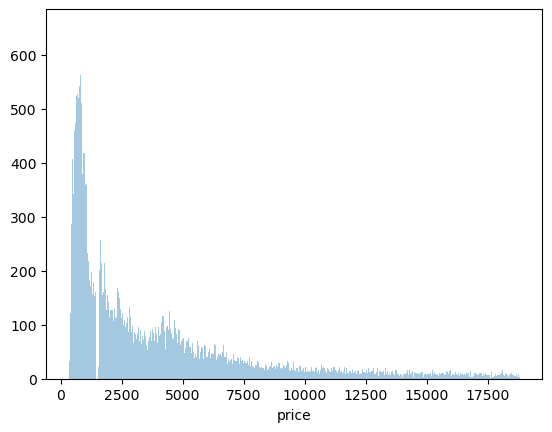

In [101]:
sns.distplot(df["price"], kde = False, bins = 1000);

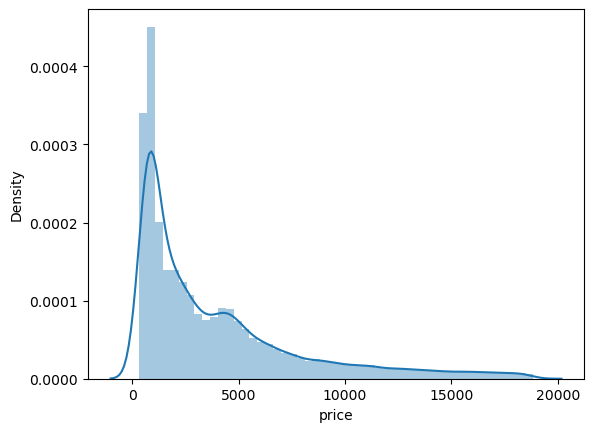

In [103]:
sns.distplot(df["price"]);

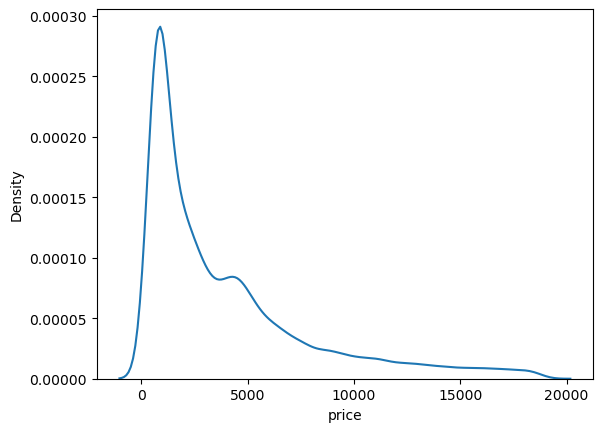

In [105]:
sns.distplot(df["price"], hist = False);

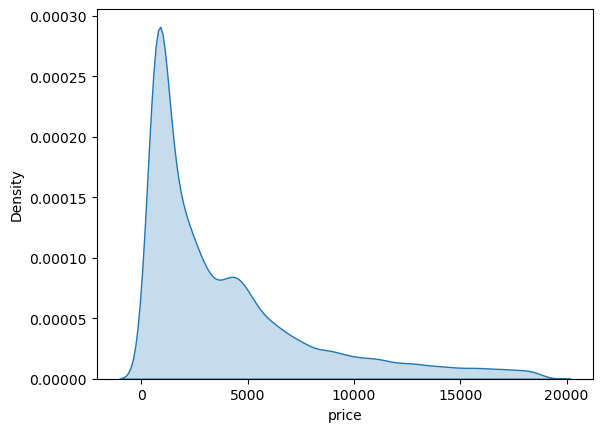

In [107]:
sns.kdeplot(df["price"], shade = True);

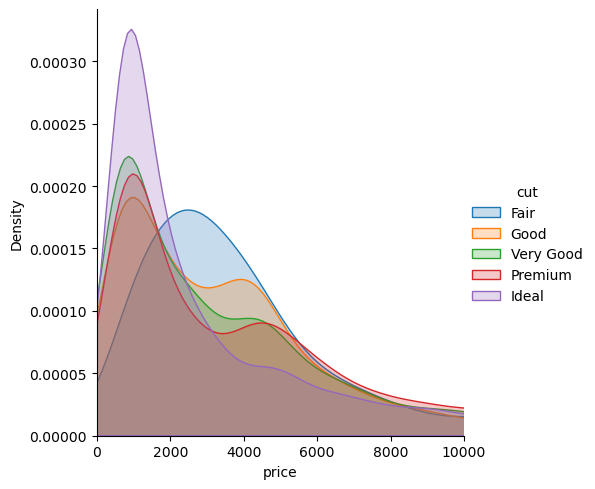

In [109]:
sns.FacetGrid(df,hue = "cut",height = 5, xlim = (0,10000)).map(sns.kdeplot,"price",shade = True).add_legend();

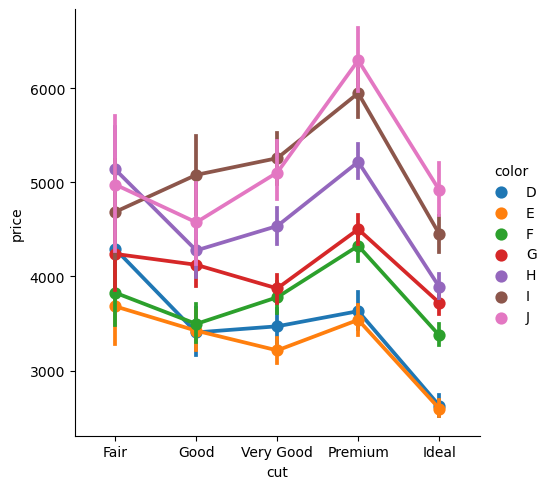

In [110]:
sns.catplot(x = "cut",y = "price", hue = "color", kind = "point", data = df);